In [123]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import matplotlib.pyplot as plt

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [124]:
# import tensorflow as tf 
# from tensorflow import keras
# import numpy as np
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# import pandas as pd
# import matplotlib.pyplot as plt

In [125]:
#Activation Functions and their derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return 2 * sigmoid(2 * z) - 1

def relu(z):
    return np.maximum(0, z)

def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

def elu(z, alpha=00.1):
    if z < 0:
        return alpha*np.exp(z)-1
    elif z >= 1:
        return z

def softplus(z):
    return np.log(1 + np.exp(z))

def derivative(f, z, eps = 0.00001):
    return (f(z + eps) - f(z - eps)) / (2*eps)

In [126]:
keras_initializers = [name for name in dir(keras.initializers) if not name.startswith("_")]
keras_initializers

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'IdentityInitializer',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'OrthogonalInitializer',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [127]:
keras_activations = [name for name in dir(keras.activations ) if not name.startswith("_")]
keras_activations

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'leaky_relu',
 'linear',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [128]:
relu_varaints = [m for m in dir(keras.layers) if "relu" in m.lower()]
relu_varaints

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [129]:
#Training Fashion mnist with Leaky Relu
fashion_mnist =  keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train  = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train  = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

tf.random.set_seed(42)
np.random.seed(42)

leaky_relu_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.SGD(learning_rate=0.001)
leaky_relu_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

leaky_relu_history = leaky_relu_model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4920 - loss: 1.6239 - val_accuracy: 0.7240 - val_loss: 0.8586
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7260 - loss: 0.8255 - val_accuracy: 0.7678 - val_loss: 0.7043
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7649 - loss: 0.6991 - val_accuracy: 0.7906 - val_loss: 0.6335
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7876 - loss: 0.6350 - val_accuracy: 0.8070 - val_loss: 0.5896
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8021 - loss: 0.5935 - val_accuracy: 0.8162 - val_loss: 0.5590
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8110 - loss: 0.5640 - val_accuracy: 0.8234 - val_loss: 0.5363
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8178 - loss: 0.5417 - val_accuracy: 0.8300 - val_loss: 0.5186
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8223 - loss: 0.5240 - 

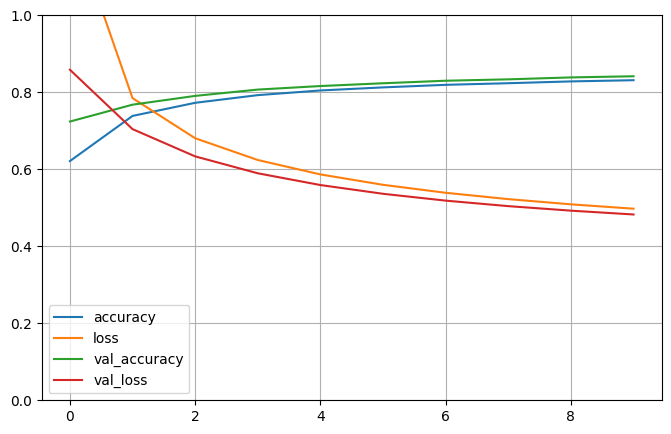

In [130]:
pd.DataFrame(leaky_relu_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [131]:
#Training Fashion mnist with PReLU
tf.random.set_seed(42)
np.random.seed(42)

prelu_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.SGD(learning_rate=0.001)
prelu_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

prelu_history = prelu_model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4735 - loss: 1.6915 - val_accuracy: 0.7142 - val_loss: 0.9023
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7184 - loss: 0.8609 - val_accuracy: 0.7632 - val_loss: 0.7283
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7596 - loss: 0.7212 - val_accuracy: 0.7910 - val_loss: 0.6504
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7846 - loss: 0.6507 - val_accuracy: 0.8064 - val_loss: 0.6015
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8014 - loss: 0.6047 - val_accuracy: 0.8188 - val_loss: 0.5672
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8112 - loss: 0.5720 - val_accuracy: 0.8256 - val_loss: 0.5419
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8180 - loss: 0.5472 - val_accuracy: 0.8326 - val_loss: 0.5221
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8247 - loss: 0.5277 - 

In [132]:
#Training Fashion mnist with ELU
tf.random.set_seed(42)
np.random.seed(42)

elu_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.SGD(learning_rate=0.001)
elu_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

elu_history = elu_model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5210 - loss: 1.4740 - val_accuracy: 0.7484 - val_loss: 0.7788
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7504 - loss: 0.7489 - val_accuracy: 0.7802 - val_loss: 0.6517
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7841 - loss: 0.6436 - val_accuracy: 0.8006 - val_loss: 0.5930
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8004 - loss: 0.5904 - val_accuracy: 0.8142 - val_loss: 0.5573
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8103 - loss: 0.5569 - val_accuracy: 0.8208 - val_loss: 0.5327
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8179 - loss: 0.5333 - val_accuracy: 0.8250 - val_loss: 0.5146
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8226 - loss: 0.5156 - val_accuracy: 0.8306 - val_loss: 0.5005
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8277 - loss: 0.5017 - 

In [133]:

from scipy.special import erfc
# alpha and scale to self normalize with mean 0 and standard deviation 1
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)
# Element-wise ELU function to handle array input

def elu(z, alpha):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [134]:
#Training Fashion mnist with SELU with 100 Hidden Layers
tf.random.set_seed(42)
np.random.seed(42)

selu_model = keras.models.Sequential()
selu_model.add(keras.layers.Flatten(input_shape=[28, 28]))
selu_model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    selu_model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
selu_model.add(keras.layers.Dense(10, activation="softmax"))

selu_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

selu_history = selu_model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.2656 - loss: 1.9069 - val_accuracy: 0.6378 - val_loss: 0.9075
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.6887 - loss: 0.7940 - val_accuracy: 0.7298 - val_loss: 0.6810
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.7615 - loss: 0.6349 - val_accuracy: 0.7488 - val_loss: 0.6640
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7844 - loss: 0.5664 - val_accuracy: 0.7578 - val_loss: 0.6335
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8042 - loss: 0.5231 - val_accuracy: 0.8078 - val_loss: 0.5204
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8235 - loss: 0.4913 - val_accuracy: 0.8058 - val_loss: 0.5286
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8313 - loss: 0.4807 - val_accuracy: 0.8078 - val_loss: 0.5187
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8289 -

In [135]:
#Batch Normalization
tf.random.set_seed(42)
np.random.seed(42)

bn_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

bn_model.summary()

bn_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer=keras.optimizers.SGD(learning_rate=0.001),
                 metrics=['accuracy'])

bn_history = bn_model.fit(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid))

Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_68 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1396 (Dense)              │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1397 (Dense)              │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1398 (Dense)              │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6172 - loss: 1.1550 - val_accuracy: 0.8226 - val_loss: 0.5449
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8039 - loss: 0.5819 - val_accuracy: 0.8422 - val_loss: 0.4742
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8259 - loss: 0.5116 - val_accuracy: 0.8482 - val_loss: 0.4413
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8382 - loss: 0.4733 - val_accuracy: 0.8524 - val_loss: 0.4209
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8473 - loss: 0.4470 - val_accuracy: 0.8558 - val_loss: 0.4067
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8537 - loss: 0.4270 - val_accuracy: 0.8584 - val_loss: 0.3961
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8586 - loss: 0.4107 - val_accuracy: 0.8624 - val_loss: 0.3876
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8629 - loss: 0.3967 - 

In [136]:
#Batch Normalization - BEFORE activation function
bn_before_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax')
])

bn_before_model.summary()

bn_before_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer=keras.optimizers.SGD(learning_rate=0.001),
                 metrics=['accuracy'])

bn_before_history = bn_before_model.fit(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid))

Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_69 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1399 (Dense)              │ (None, 300)            │       235,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1400 (Dense)              │ (None, 100)            │        30,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1401 (Dense)              │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 272,146 (1.04 MB)

 Trainable params: 269,178 (1.03 MB)

 Non-trainable params: 2,968 (11.59 KB)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5514 - loss: 1.3989 - val_accuracy: 0.7932 - val_loss: 0.6736
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7759 - loss: 0.7153 - val_accuracy: 0.8244 - val_loss: 0.5558
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8029 - loss: 0.6100 - val_accuracy: 0.8334 - val_loss: 0.5003
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8171 - loss: 0.5555 - val_accuracy: 0.8434 - val_loss: 0.4669
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8270 - loss: 0.5202 - val_accuracy: 0.8494 - val_loss: 0.4442
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8348 - loss: 0.4946 - val_accuracy: 0.8544 - val_loss: 0.4275
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8402 - loss: 0.4746 - val_accuracy: 0.8576 - val_loss: 0.4146
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8452 - loss: 0.4583 

In [137]:
#RELU with Gradient Clipping
tf.random.set_seed(42)
np.random.seed(42)

gc_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.SGD(clipvalue=1.0)

gc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

gc_history = gc_model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6905 - loss: 0.9651 - val_accuracy: 0.8300 - val_loss: 0.5069
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8248 - loss: 0.4960 - val_accuracy: 0.8508 - val_loss: 0.4428
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8433 - loss: 0.4446 - val_accuracy: 0.8580 - val_loss: 0.4130
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8535 - loss: 0.4156 - val_accuracy: 0.8646 - val_loss: 0.3934
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8608 - loss: 0.3943 - val_accuracy: 0.8686 - val_loss: 0.3781
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8659 - loss: 0.3774 - val_accuracy: 0.8696 - val_loss: 0.3670
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8708 - loss: 0.3633 - val_accuracy: 0.8740 - val_loss: 0.3566
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8753 - loss: 0.3511 - 

In [138]:
#Reusing Pretrained Layers

#Split Fashion Mnist into 
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [139]:
tf.random.set_seed(42)
np.random.seed(42)

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300,100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation='selu'))
model_A.add(keras.layers.Dense(8, activation='softmax'))

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))

model_A.save('model_A.h5')

Epoch 1/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7282 - loss: 0.8346 - val_accuracy: 0.8749 - val_loss: 0.3815
Epoch 2/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8736 - loss: 0.3670 - val_accuracy: 0.8901 - val_loss: 0.3288
Epoch 3/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8855 - loss: 0.3239 - val_accuracy: 0.8966 - val_loss: 0.3070
Epoch 4/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8935 - loss: 0.3024 - val_accuracy: 0.8981 - val_loss: 0.2946
Epoch 5/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8987 - loss: 0.2881 - val_accuracy: 0.9036 - val_loss: 0.2854
Epoch 6/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9038 - loss: 0.2777 - val_accuracy: 0.9036 - val_loss: 0.2795
Epoch 7/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9070 - loss: 0.2696 - val_accuracy: 0.9048 - val_loss: 0.2747
Epoch 8/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9096 - loss: 0.2629 - 

In [140]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300,100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation='selu'))
model_B.add(keras.layers.Dense(8, activation='softmax'))

model_B.compile(loss='sparse_categorical_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

model_B.save('model_B.h5')

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2073 - loss: 2.3675 - val_accuracy: 0.5892 - val_loss: 1.2368
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6385 - loss: 1.0541 - val_accuracy: 0.7353 - val_loss: 0.8227
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8465 - loss: 0.6783 - val_accuracy: 0.8428 - val_loss: 0.5997
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9154 - loss: 0.4828 - val_accuracy: 0.9016 - val_loss: 0.4689
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9850 - loss: 0.3688 - val_accuracy: 0.9432 - val_loss: 0.3850
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9900 - loss: 0.2961 - val_accuracy: 0.9655 - val_loss: 0.3274
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.2467 - val_accuracy: 0.9736 - val_loss: 0.2857
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.2108 - val_accuracy: 0.9767 - val_loss: 0.2541


In [141]:
model_A = keras.models.load_model('model_A.h5')
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=5,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9248 - loss: 0.2101 - val_accuracy: 0.9686 - val_loss: 0.1647
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9805 - loss: 0.1408 - val_accuracy: 0.9878 - val_loss: 0.1268
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9854 - loss: 0.1077 - val_accuracy: 0.9909 - val_loss: 0.1053
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9904 - loss: 0.0884 - val_accuracy: 0.9939 - val_loss: 0.0914
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9931 - loss: 0.0759 - val_accuracy: 0.9949 - val_loss: 0.0817


In [142]:
# Faster Optimizers

# Momentum Optimization - Use when facing high variance in gradients; helps accelerate SGD in the relevant direction 
# and dampens oscillations, making it effective in handling sparse gradients.
momentum_optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# Nesterov Accelerated Gradient - Best for problems where gradients exhibit momentum-like properties but require 
# more accurate, corrective steps; often used for computer vision tasks due to better convergence.
nesterov_optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

# AdaGrad - Ideal for sparse data (like text or recommendation systems) as it adapts the learning rate for each 
# parameter individually, making frequent updates smaller and rare updates larger.
ada_optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

# RMSProp - Works well for recurrent neural networks (RNNs) and other tasks with non-stationary objectives, 
# due to its ability to handle noisy gradients effectively.
rms_prop_optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

# Adam Optimization - Generally recommended as a go-to optimizer for most deep learning tasks due to its adaptive 
# learning rate, making it highly effective in handling sparse gradients and requiring minimal tuning.
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Adamax Optimization - A variant of Adam that is useful when gradients are unbounded or have a large range; 
# often chosen for models with non-smooth loss surfaces.
adamax_optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Nadam Optimization - Effective for sequences or time-series data as it combines Nesterov momentum with Adam, 
# often providing faster convergence in RNNs or LSTMs.
nadam_optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [143]:
#Learning Rate Scheduling - Power Scheduling
#Set decay in the optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=0.0001)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=25,
                    validation_data=(X_valid_scaled, y_valid))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7927 - loss: 0.6022 - val_accuracy: 0.8598 - val_loss: 0.4061
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8625 - loss: 0.3833 - val_accuracy: 0.8698 - val_loss: 0.3743
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8762 - loss: 0.3456 - val_accuracy: 0.8730 - val_loss: 0.3576
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8846 - loss: 0.3209 - val_accuracy: 0.8766 - val_loss: 0.3479
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8919 - loss: 0.3022 - val_accuracy: 0.8788 - val_loss: 0.3417
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8976 - loss: 0.2868 - val_accuracy: 0.8824 - val_loss: 0.3370
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9027 - loss: 0.2733 - val_accuracy: 0.8832 - val_loss: 0.3341
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9070 - loss: 0.2615 - 

In [144]:
#Learning Rate Scheduling - Exponential Scheduling

def exponential_decay_fn(epoch):
    return 0.01*0.1**(epoch/20)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0*0.1**(epoch/20)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer='nadam', metrics=["accuracy"])

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

history = model.fit(X_train_scaled, y_train, epochs=25,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7568 - loss: 1.0098 - val_accuracy: 0.8056 - val_loss: 0.6997 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8005 - loss: 0.6448 - val_accuracy: 0.8234 - val_loss: 0.6432 - learning_rate: 0.0089
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8193 - loss: 0.6193 - val_accuracy: 0.8206 - val_loss: 0.6284 - learning_rate: 0.0079
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8372 - loss: 0.5234 - val_accuracy: 0.8144 - val_loss: 0.6783 - learning_rate: 0.0071
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8370 - loss: 0.5407 - val_accuracy: 0.8328 - val_loss: 0.5373 - learning_rate: 0.0063
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8502 - loss: 0.4765 - val_accuracy: 0.8428 - val_loss: 0.6294 - learning_rate: 0.0056
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8625 - l

In [145]:
#Learning Rate Scheduling - Piecewise Scheduling

def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer='nadam', metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=25,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7528 - loss: 0.9996 - val_accuracy: 0.7646 - val_loss: 0.8388 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7852 - loss: 0.7074 - val_accuracy: 0.7524 - val_loss: 0.8950 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7663 - loss: 0.8088 - val_accuracy: 0.7250 - val_loss: 0.9168 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7473 - loss: 0.8821 - val_accuracy: 0.8278 - val_loss: 0.6590 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7726 - loss: 0.7713 - val_accuracy: 0.7334 - val_loss: 0.8751 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7802 - loss: 0.6913 - val_accuracy: 0.8246 - val_loss: 0.6391 - learning_rate: 0.0050
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8388 - l

In [146]:
#Learning Rate Scheduling - Performance Scheduling
tf.random.set_seed(42)
np.random.seed(42)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7753 - loss: 0.7166 - val_accuracy: 0.8430 - val_loss: 0.5025 - learning_rate: 0.0200
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8342 - loss: 0.5151 - val_accuracy: 0.8472 - val_loss: 0.5485 - learning_rate: 0.0200
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8416 - loss: 0.5107 - val_accuracy: 0.8374 - val_loss: 0.6376 - learning_rate: 0.0200
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8491 - loss: 0.5226 - val_accuracy: 0.8492 - val_loss: 0.5953 - learning_rate: 0.0200
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8429 - loss: 0.5669 - val_accuracy: 0.8490 - val_loss: 0.5764 - learning_rate: 0.0200
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8459 - loss: 0.5683 - val_accuracy: 0.8498 - val_loss: 0.7544 - learning_rate: 0.0200
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8791 - l

In [147]:
#Learning Rate Scheduling - tf.keras Schedulers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7914 - loss: 0.6044 - val_accuracy: 0.8618 - val_loss: 0.4014
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8629 - loss: 0.3843 - val_accuracy: 0.8692 - val_loss: 0.3745
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8755 - loss: 0.3498 - val_accuracy: 0.8732 - val_loss: 0.3612
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8834 - loss: 0.3275 - val_accuracy: 0.8754 - val_loss: 0.3529
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8896 - loss: 0.3109 - val_accuracy: 0.8778 - val_loss: 0.3466
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8948 - loss: 0.2977 - val_accuracy: 0.8764 - val_loss: 0.3422
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8979 - loss: 0.2867 - val_accuracy: 0.8782 - val_loss: 0.3387
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9008 - loss: 0.2775 - 

In [148]:
#Avoiding Overfitting Through L1 and L2 Regularization 
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='elu',
                       kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation='elu',
                       kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation='softmax',
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both l1 and l2 regularization, with factors 0.1 and 0.01 respectively

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=10,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7946 - loss: 3.2512 - val_accuracy: 0.8390 - val_loss: 0.7075
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8220 - loss: 0.7295 - val_accuracy: 0.8438 - val_loss: 0.6838
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8292 - loss: 0.7047 - val_accuracy: 0.8482 - val_loss: 0.6705
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8333 - loss: 0.6971 - val_accuracy: 0.8518 - val_loss: 0.6644
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8341 - loss: 0.6932 - val_accuracy: 0.8540 - val_loss: 0.6622
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8363 - loss: 0.6900 - val_accuracy: 0.8522 - val_loss: 0.6605
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8369 - loss: 0.6872 - val_accuracy: 0.8536 - val_loss: 0.6602
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8368 - loss: 0.6852 - 

In [149]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation='elu',
                           kernel_initializer='he_normal',
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7966 - loss: 3.3476 - val_accuracy: 0.8412 - val_loss: 0.7085
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8228 - loss: 0.7309 - val_accuracy: 0.8444 - val_loss: 0.6870
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8311 - loss: 0.7051 - val_accuracy: 0.8458 - val_loss: 0.6778
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8362 - loss: 0.6954 - val_accuracy: 0.8482 - val_loss: 0.6722
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8389 - loss: 0.6900 - val_accuracy: 0.8522 - val_loss: 0.6668
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8399 - loss: 0.6863 - val_accuracy: 0.8490 - val_loss: 0.6636
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8399 - loss: 0.6839 - val_accuracy: 0.8496 - val_loss: 0.6624
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8402 - loss: 0.6827 

In [150]:
#Dropout Regularization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7614 - loss: 0.7497 - val_accuracy: 0.8662 - val_loss: 0.3672
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8432 - loss: 0.4317 - val_accuracy: 0.8698 - val_loss: 0.3567
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8535 - loss: 0.4014 - val_accuracy: 0.8760 - val_loss: 0.3362
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8612 - loss: 0.3769 - val_accuracy: 0.8752 - val_loss: 0.3313
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8636 - loss: 0.3715 - val_accuracy: 0.8840 - val_loss: 0.3189
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8688 - loss: 0.3503 - val_accuracy: 0.8814 - val_loss: 0.3230
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8715 - loss: 0.3419 - val_accuracy: 0.8852 - val_loss: 0.3231
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8771 - loss: 0.3340 -

In [154]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8048 - loss: 0.5722 - val_accuracy: 0.8706 - val_loss: 0.3629
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8665 - loss: 0.3678 - val_accuracy: 0.8712 - val_loss: 0.3530
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8785 - loss: 0.3335 - val_accuracy: 0.8744 - val_loss: 0.3541
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8831 - loss: 0.3195 - val_accuracy: 0.8758 - val_loss: 0.3560
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8845 - loss: 0.3121 - val_accuracy: 0.8744 - val_loss: 0.3512
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8876 - loss: 0.3058 - val_accuracy: 0.8758 - val_loss: 0.3521
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8861 - loss: 0.3046 - val_accuracy: 0.8772 - val_loss: 0.3440
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8891 - loss: 0.3019 -